# Projeto Ciencia de Dados: Carteira de Ações com Inteligência Artificial

-Projeto precisa de dados do site [Fundamentus](https://fundamentus.com.br/).


### Criar Dicionários de Dataframes com cada empresa

In [64]:
import pandas as pd
import os
import numpy as np
empresas=["ITUB3","BBAS3","BBDC3","MGLU3","WEGE3","EGIE3","BIDI3"]
#fundamentos={"ITUB3":balando_dre_itub3, }
fundamentos={}
arquivos=os.listdir("balancos")
for arquivo in arquivos:
    nome=arquivo[-9:-4]
    if nome in empresas:
        balanco=pd.read_excel(f"balancos\{arquivo}",sheet_name=0)
        #na 1 coluna colocar o titulo como nome da empresa 
        balanco.iloc[0,0]=nome
        #pegar a primeira linha e tornar cabeçalho e excluir a index columns
        balanco.columns=balanco.iloc[0]
        balanco=balanco[1:]
        balanco=balanco.set_index(nome)
        dre=pd.read_excel(f"balancos\{arquivo}",sheet_name=1)
        dre.iloc[0,0]=nome
        dre.columns=dre.iloc[0]
        dre=dre[1:]
        dre=dre.set_index(nome)
        fundamentos[nome]=balanco.append(dre)
        
fundamentos.keys()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

dict_keys(['BBAS3', 'BBDC3', 'BIDI3', 'EGIE3', 'ITUB3', 'MGLU3', 'WEGE3'])

Ler as Cotações do Yahoo Finance

In [65]:
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import datetime

cotacoes={}
cotacoes_df=pd.DataFrame()
def ler_cotacoes(nome,data_inicio,data_fim):
    cotacao= web.get_data_yahoo(nome,start=data_inicio,end=data_fim)
    cotacao=cotacao.assign(Empresa=nome)
    return cotacao

for nome in empresas:
    start=datetime.datetime(2012, 12, 20)
    end=datetime.datetime(2021, 6, 20)
    cotacao_empresa=ler_cotacoes(nome+".SA",start,end)
    cotacoes[nome]=cotacao_empresa
    cotacoes_df=cotacoes_df.append(cotacao_empresa)

cotacoes.keys()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


dict_keys(['ITUB3', 'BBAS3', 'BBDC3', 'MGLU3', 'WEGE3', 'EGIE3', 'BIDI3'])

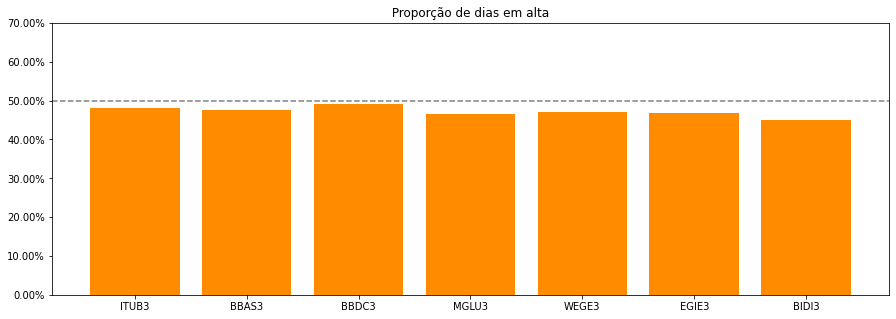

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
dias_alta = {}
crescimento_alta = {}
queda_baixa = {}
df_grafico = pd.DataFrame()
for k , v in cotacoes.items():
    df_grafico[k] = v['Adj Close']
    df_grafico[f'{k} Alta'] = (v['Close'] > v['Open'])
    dias_alta[k] = df_grafico[f'{k} Alta'] .mean() *100
    crescimento_alta[k] = [i for i in ((v['Close'] > v['Open']) * (v['Close'] / v['Open'])).tolist() if i>0]
    queda_baixa[k] = [i for i in ((v['Close'] < v['Open']) * ( v['Close'] / v['Open'] )).tolist() if i>0]

fig , ax = plt.subplots(figsize=(15,5))
ax.yaxis.set_major_formatter('{x:1.2f}%')
ax.bar(dias_alta.keys() , dias_alta.values() , color='darkorange')
_=ax.set_ylim([0,70])
ax.axhline(50,color='gray',ls='--')
ax.title.set_text(' Proporção de dias em alta ')
    

Olhando o gráfico acima percebemos que dias de alta não são maioria, isso desconsiderando GAP de abertura e fechamento entre dias. Abaixo vamos ver a distribuição da variação diária para dias de alta e dias de baixa.

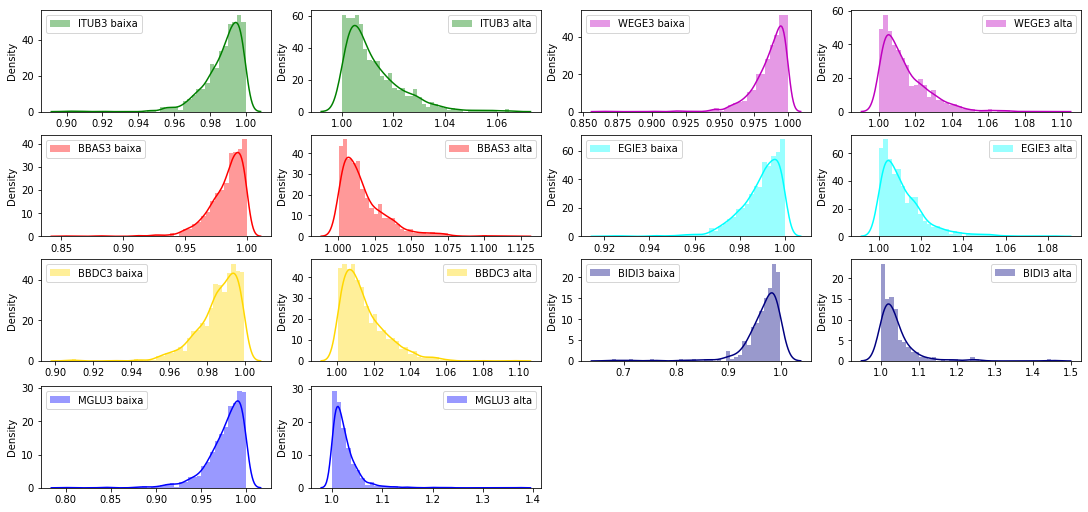

In [66]:
from IPython.display import display , clear_output
figura = plt.figure(figsize=(15,7), constrained_layout=True)

gs = figura.add_gridspec(4, 4)

linha = 0
g=0
corcount = 0
colors = ['green','red','gold','blue','m','cyan','navy']
for key in cotacoes.keys():
    ax1 = plt.subplot(gs[linha,g])
    ax2 = plt.subplot(gs[linha,g+1])
    sns.distplot(crescimento_alta[key],kde=True,rug=False,ax=ax2,bins=40,label=f'{key} alta' , color=colors[corcount])
    sns.distplot(queda_baixa[key],kde=True,rug=False,ax=ax1,bins=40,label=f'{key} baixa',color=colors[corcount])
    corcount+=1
    ax1.legend()
    ax2.legend()
    linha+=1
    if linha >3:
        g=2
        linha=0

clear_output(wait=True)
plt.show()

Aparentemente parece um gráfico de uma normal cortado ao meio, mas será que é mesmo, vamos utilizar o teste de Shapiro-Wilk cuja hipótese nula é de normalidade.

In [67]:
from scipy.stats import shapiro

todos_dias = {}
teste_normal = pd.DataFrame
for key in queda_baixa.keys():
    lista_p_shapiro = crescimento_alta[key] + queda_baixa[key]
    statistic, pvalor = shapiro(lista_p_shapiro)
    print(f' {key} : Hipótese nula de normalidade rejeitada, com p-Valor de {pvalor}')

 ITUB3 : Hipótese nula de normalidade rejeitada, com p-Valor de 5.76349857613355e-16
 BBAS3 : Hipótese nula de normalidade rejeitada, com p-Valor de 8.270511587871631e-19
 BBDC3 : Hipótese nula de normalidade rejeitada, com p-Valor de 2.8491431436350467e-10
 MGLU3 : Hipótese nula de normalidade rejeitada, com p-Valor de 1.9447305071606998e-32
 WEGE3 : Hipótese nula de normalidade rejeitada, com p-Valor de 2.267755353983528e-18
 EGIE3 : Hipótese nula de normalidade rejeitada, com p-Valor de 1.0238673601119452e-19
 BIDI3 : Hipótese nula de normalidade rejeitada, com p-Valor de 9.260190022303111e-21


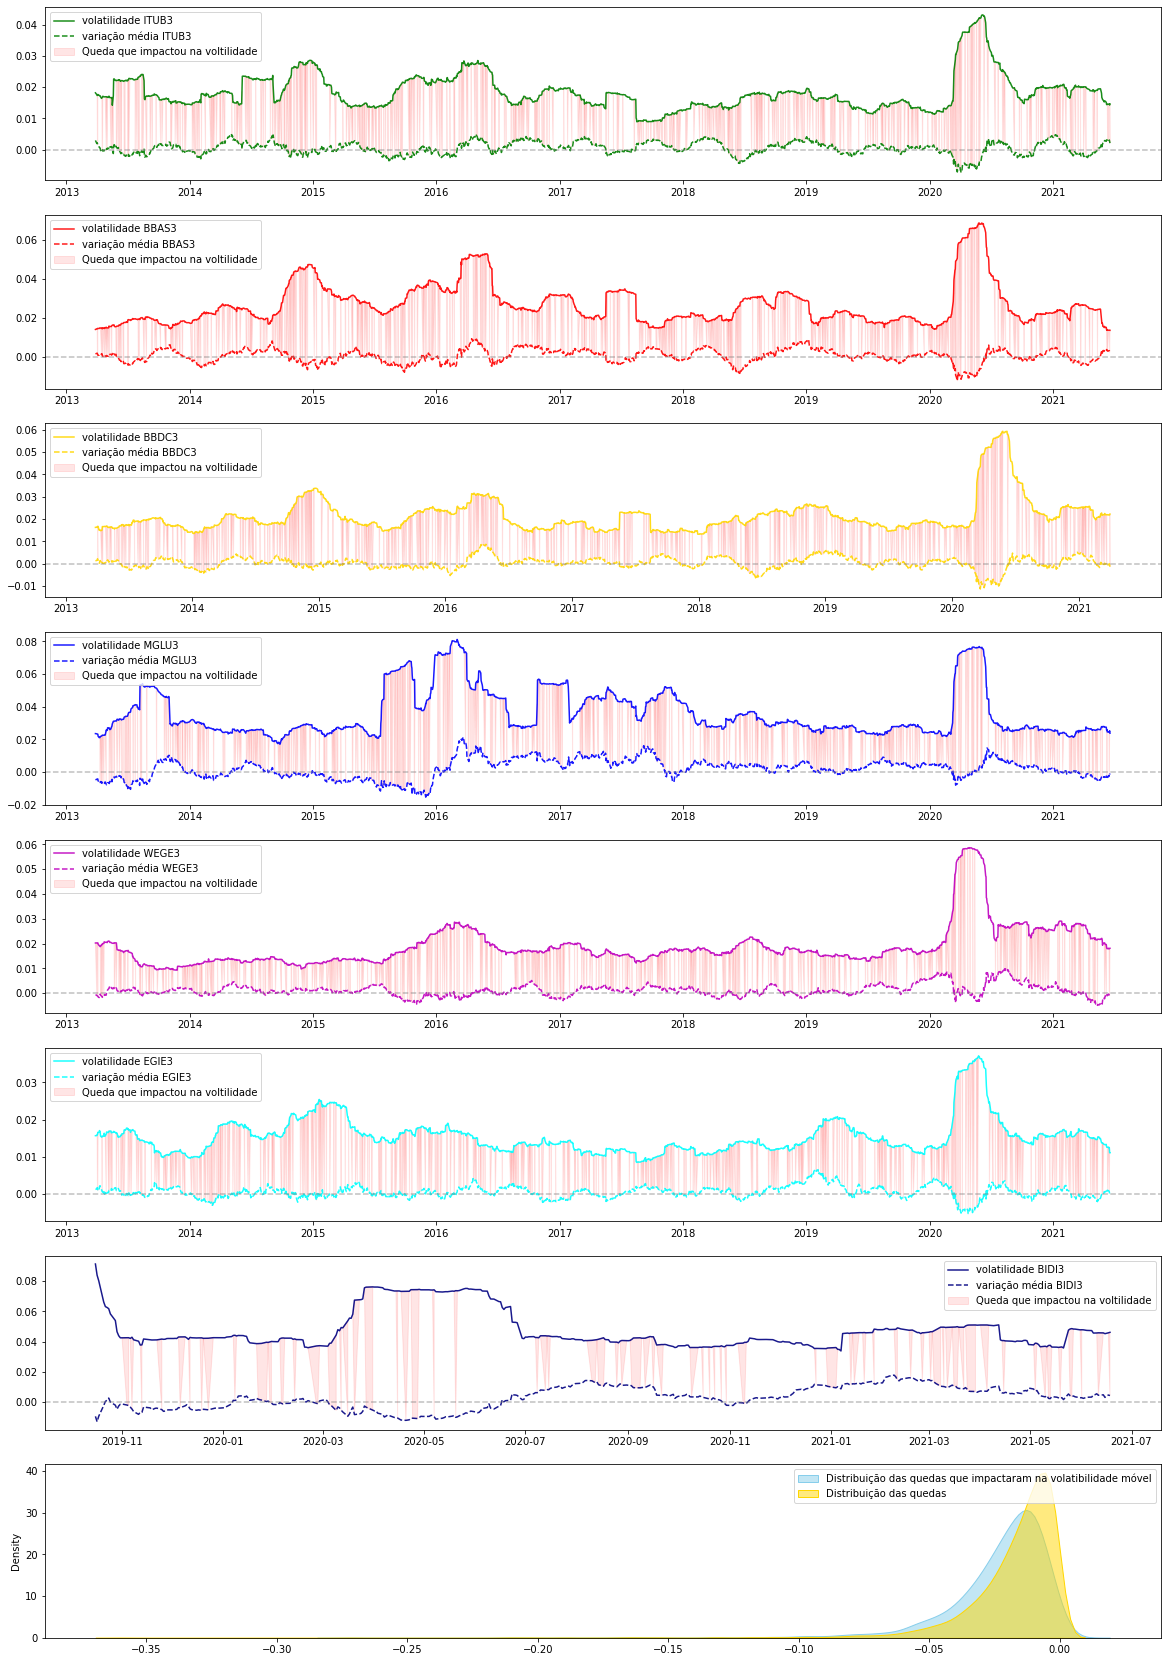

In [68]:
fig,ax = plt.subplots(8,1,figsize = (20,30))
i = -1
dias_queda=[]
dias_todos = []
for key in cotacoes.keys():
    i+=1
    empresa_x = cotacoes[key][:].copy()
    empresa_x ['variacao'] = empresa_x['Adj Close'] / empresa_x['Adj Close'].shift(1)
    empresa_x ['Volátil Móvel'] = empresa_x ['variacao'].rolling(63).std()
    empresa_x ['Variação Média'] = empresa_x['variacao'].rolling(63).apply(lambda x: np.prod(x)**(1/63)) - 1
    empresa_x ['Preenche'] = (empresa_x['Volátil Móvel'] > empresa_x['Volátil Móvel'].shift(1)) * (empresa_x['Variação Média'] < empresa_x['Variação Média'].shift(1))
    parte = (empresa_x[empresa_x['Preenche']]['variacao'] -1).tolist()
    dias_queda += parte
    dias_todos += (empresa_x ['variacao']-1).tolist()
    empresa_x.dropna(inplace=True)
    ax[i].plot(empresa_x['Volátil Móvel'], color =colors[i] , alpha=.9 , label=f"volatilidade {key}")
    ax[i].plot(empresa_x['Variação Média'], color =colors[i] , alpha=.9 , ls='--', label=f"variação média {key}")

    ax[i].fill_between(empresa_x.index , empresa_x['Volátil Móvel'],empresa_x['Variação Média'], where=(empresa_x['Preenche'] > 0),
        interpolate=True, color="red", alpha=0.1,label='Queda que impactou na voltilidade')
    ax[i].axhline(0,ls='--',color='gray',alpha=.5)
    ax[i].legend()



dias_todos = [i for i in dias_todos if i<0]
sns.kdeplot(dias_queda,color="skyblue", ax=ax[7],fill=True,alpha=.5, label='Distribuição das quedas que impactaram na volatibilidade móvel')
sns.kdeplot(dias_todos,color="gold", ax=ax[7],fill=True,alpha=.5,label='Distribuição das quedas')
ax[7].legend()
del(parte)
del(empresa_x)
del(dias_queda)
del(dias_todos)

### Pegar Preços das Ações nas Datas Correspondentes

### Remover empresas que tem cotações vazias da análise (mesmo após o tratamento que fizemos na hora de pegar as cotações)

In [69]:

for empresa in empresas:
    if cotacoes[empresa].isnull().values.any():
        cotacoes.pop(empresa)
        fundamentos.pop(empresa)

empresas=list(cotacoes.keys())
print(empresas)


['ITUB3', 'BBAS3', 'MGLU3', 'WEGE3', 'EGIE3', 'BIDI3']


### Juntar fundamentos com Preço da Ação

In [70]:
#no fundamentos precisamos 
    #trocar linhas por colunas
    #tratar as datas formato de data no python
    #juntar os fundamentos com a coluna Adj Close das cotações

for empresa in fundamentos:
    tabela=fundamentos[empresa].transpose() #trasnpose
    tabela.index=pd.to_datetime(tabela.index, format="%d/%m/%Y")
    tabela_cotacao=cotacoes[empresa][["Adj Close"]]
    tabela_final=tabela.merge(tabela_cotacao,right_index=True,left_index=True)
    tabela_final.index.name=empresa
    fundamentos[empresa]=tabela_final



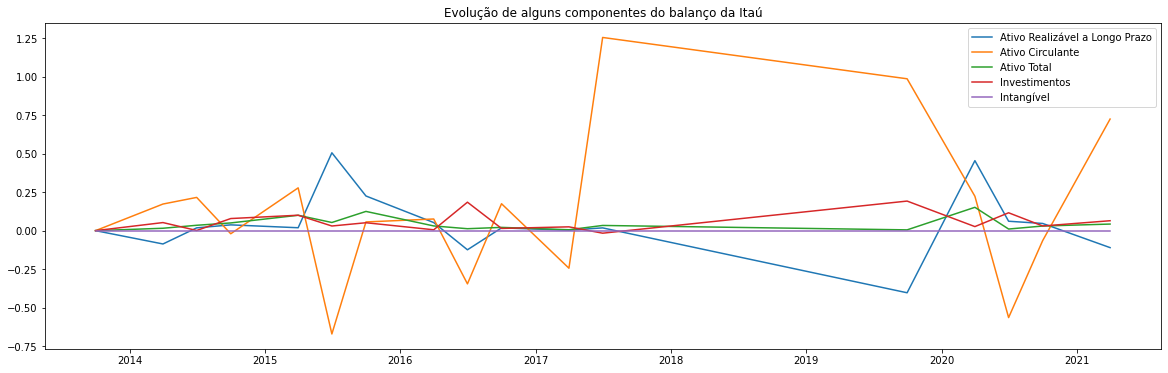

In [97]:
grafico = fundamentos['ITUB3']
grafico.index=pd.to_datetime(grafico.index)
fig,ax = plt.subplots(1,1,figsize=(20,6))
colunas = set(grafico.columns[0:5])
for coluna in colunas:
    ax.plot(grafico[coluna],label=coluna)
    ax.legend()
ax.title.set_text ('Evolução de alguns componentes do balanço da Itaú')


### Tratar colunas
    
1. Vamos pegar apenas empresas que possuem as mesmas colunas
2. Analisar valores vazios nas colunas

#### 1. Remover da análise tabelas que tem colunas diferentes   

In [73]:
colunas=[]
colunas_iguais=[]
for empresa in fundamentos:
    fundamentos[empresa]= fundamentos[empresa].loc[:,~fundamentos[empresa].columns.duplicated()]
    for coluna in fundamentos[empresa].columns:
        colunas.append(coluna)
for coluna in colunas:
    if colunas.count(coluna)>=len(fundamentos) and coluna not in colunas_iguais:
        colunas_iguais.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa]=fundamentos[empresa][colunas_iguais]
    fundamentos[empresa][colunas_iguais] = fundamentos[empresa][colunas_iguais].astype(float)
    #fundamentos[empresa][colunas_iguais] = fundamentos[empresa][colunas_iguais].apply(np.float32)
print(colunas_iguais)


['Ativo Total', 'Ativo Circulante', 'Ativo Realizável a Longo Prazo', 'Investimentos', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Part. de Acionistas Não Controladores', 'Patrimônio Líquido', 'Capital Social Realizado', 'Reservas de Capital', 'Reservas de Reavaliação', 'Ajustes de Avaliação Patrimonial', 'Lucros/Prejuízos Acumulados', 'Outras Receitas Operacionais', 'Outras Despesas Operacionais', 'Resultado da Equivalência Patrimonial', 'Resultado Não Operacional', 'Receitas', 'Despesas', 'Resultado Antes Tributação/Participações', 'Provisão para IR e Contribuição Social', 'IR Diferido', 'Participações/Contribuições Estatutárias', 'Reversão dos Juros sobre Capital Próprio', 'Lucro/Prejuízo do Período', 'Adj Close']


#### 2. Analisar valores vazios nas colunas

{'Ativo Total': 0, 'Ativo Circulante': 0, 'Ativo Realizável a Longo Prazo': 0, 'Investimentos': 0, 'Intangível': 0, 'Diferido': 0, 'Passivo Total': 0, 'Passivo Circulante': 0, 'Part. de Acionistas Não Controladores': 0, 'Patrimônio Líquido': 0, 'Capital Social Realizado': 0, 'Reservas de Capital': 0, 'Reservas de Reavaliação': 0, 'Ajustes de Avaliação Patrimonial': 0, 'Lucros/Prejuízos Acumulados': 0, 'Outras Receitas Operacionais': 0, 'Outras Despesas Operacionais': 0, 'Resultado da Equivalência Patrimonial': 0, 'Resultado Não Operacional': 52, 'Receitas': 52, 'Despesas': 52, 'Resultado Antes Tributação/Participações': 0, 'Provisão para IR e Contribuição Social': 0, 'IR Diferido': 1, 'Participações/Contribuições Estatutárias': 51, 'Reversão dos Juros sobre Capital Próprio': 52, 'Lucro/Prejuízo do Período': 0, 'Adj Close': 0}
90


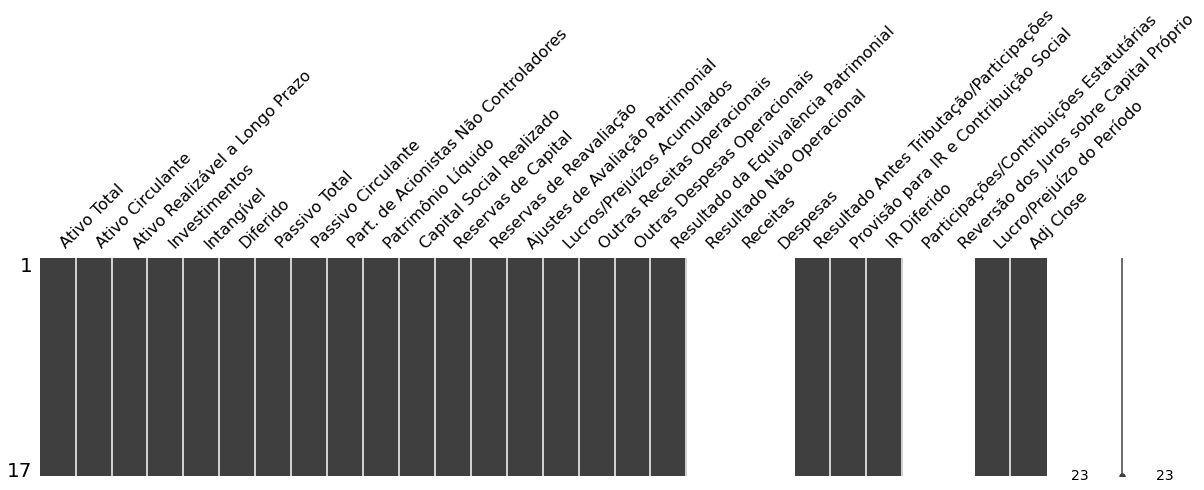

In [74]:
import missingno as msno
valores_vazios=dict.fromkeys(colunas_iguais,0)
#print(valores_vazios)
total_linhas=0
for empresa in fundamentos:
    tabela=fundamentos[empresa]
    total_linhas+=tabela.shape[0]
    for coluna in colunas_iguais:
        qtd_vazios=pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna]+=qtd_vazios
msno.matrix(tabela, figsize=(20, 4))
print(valores_vazios)
print(total_linhas)

['Resultado Não Operacional', 'Receitas', 'Despesas', 'Participações/Contribuições Estatutárias', 'Reversão dos Juros sobre Capital Próprio']


<AxesSubplot:>

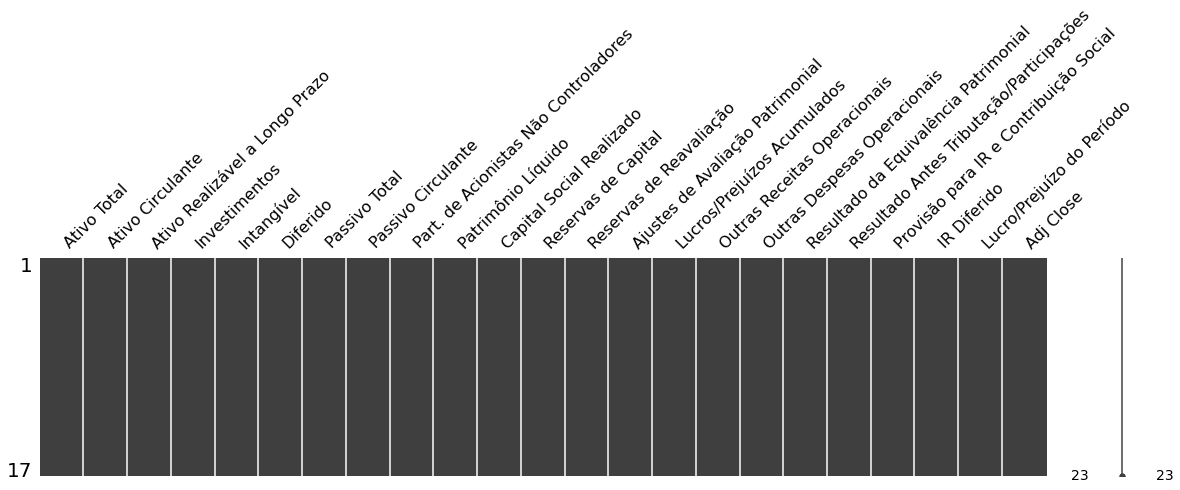

In [75]:

remover_colunas=[]

for coluna in valores_vazios:
    if valores_vazios[coluna]>=(0.4*total_linhas):
        remover_colunas.append(coluna)
for empresa in fundamentos:
    fundamentos[empresa]=fundamentos[empresa].drop(columns=remover_colunas)
    fundamentos[empresa]=fundamentos[empresa].ffill() #preenche os valores vazios com oq tem em cima dele
    tabela = fundamentos[empresa].copy()
print(remover_colunas)
msno.matrix(tabela, figsize=(20, 4))


In [76]:
for coluna in remover_colunas:
    if coluna in colunas_iguais:
        colunas_iguais.remove(coluna)
print(colunas_iguais)

['Ativo Total', 'Ativo Circulante', 'Ativo Realizável a Longo Prazo', 'Investimentos', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Part. de Acionistas Não Controladores', 'Patrimônio Líquido', 'Capital Social Realizado', 'Reservas de Capital', 'Reservas de Reavaliação', 'Ajustes de Avaliação Patrimonial', 'Lucros/Prejuízos Acumulados', 'Outras Receitas Operacionais', 'Outras Despesas Operacionais', 'Resultado da Equivalência Patrimonial', 'Resultado Antes Tributação/Participações', 'Provisão para IR e Contribuição Social', 'IR Diferido', 'Lucro/Prejuízo do Período', 'Adj Close']


### Criando os rótulos: Comprar, Não Comprar ou Vender?

Não queremos saber quando vender, mas inclui essa categoria para conseguir identificar quando que o nosso modelo vai sugerir uma compra quando na verdade o melhor momento era vender. Isso significa que o modelo errou "mais" do que quando sugeriu comprar e simplesmente o certo era não comprar

Regra: 
1. Subiu mais do que o Ibovespa (ou caiu menos) -> Comprar (Valor = 2)
2. Subiu menos do que o Ibovespa até Ibovespa - 2% (ou caiu mais do que Ibovespa até Ibovespa -2%) -> Não Comprar (Valor = 1)
3. Subiu menos do que o Ibovespa - 2% (ou caiu mais do que Ibovespa -2%) -> Vender (Valor = 0)

In [77]:
start=datetime.datetime(2012, 12, 20)
end=datetime.datetime(2021, 6, 20)
df_ibov=ler_cotacoes("^BVSP",start,end)
datas=fundamentos["ITUB3"].index
for data in datas:
    if data not in df_ibov.index:
        df_ibov.loc[data]=np.nan
df_ibov=df_ibov.sort_index()
df_ibov=df_ibov.ffill() #esta preenchendo os valores vazios com os de cima
df_ibov=df_ibov.rename(columns={"Adj Close":"IBOV"})
for empresa in fundamentos:
    fundamentos[empresa]=fundamentos[empresa].merge(df_ibov[["IBOV"]],left_index=True,right_index=True)

[*********************100%***********************]  1 of 1 completed


Tornar os indicadores em percentual
fundamentos=fundamentos trimestres/ fundamentos trimestre anterior
cotação % trimestre= cotacao trimestre seguinte / cotação trimestre

In [78]:
for empresa in fundamentos:
    fundamento=fundamentos[empresa]
    fundamento=fundamento.sort_index()
    for coluna in fundamento: #for dentro de tabela percorre as colunas
        if "Adj Close" in coluna or "IBOV" in coluna: #pegar a cotação seguinte
           pass
        else:
            condicoes=[
                (fundamento[coluna].shift(1)>0)&(fundamento[coluna]<0),
                (fundamento[coluna].shift(1)<0)&(fundamento[coluna]>0),
                (fundamento[coluna].shift(1)<0)&(fundamento[coluna]<0),
                (fundamento[coluna].shift(1)==0)&(fundamento[coluna]>0),
                (fundamento[coluna].shift(1)==0)&(fundamento[coluna]<0),
                (fundamento[coluna].shift(1)<0)&(fundamento[coluna]==0)]
            caso_1=(fundamento[coluna]/fundamento[coluna].shift(1))-1
            caso_2=-caso_1
            valores=[caso_1,caso_2,caso_2,1,-1,1]
            fundamento[coluna]=np.select(condicoes,valores,default=caso_1)
    #pegar cotação seguinte
    fundamento["Adj Close"]=(fundamento["Adj Close"].shift(-1)/fundamento["Adj Close"])-1
    fundamento["IBOV"]=(fundamento["IBOV"].shift(-1)/fundamento["IBOV"])-1
    fundamento["Resultado"]=fundamento["Adj Close"]-fundamento["IBOV"]
    condicoes=[
        (fundamento["Resultado"]>0),
        (fundamento["Resultado"]<0)&(fundamento["Resultado"]>=-0.02),
        (fundamento["Resultado"]<-0.02)
    ]
    valores=[2,1,0] #2- compra, 1- nao compra, 0-vende
    fundamento["Decisao"]=np.select(condicoes,valores)

    fundamentos[empresa]=fundamento
display(fundamentos["ITUB3"].head())

,Ativo Total,Ativo Circulante,Ativo Realizável a Longo Prazo,Investimentos,Intangível,Diferido,Passivo Total,Passivo Circulante,Part. de Acionistas Não Controladores,Patrimônio Líquido,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Decisao
2013-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.089716,-0.036742,0.126458,2
2014-03-31,0.015538,0.172875,-0.086568,0.052482,NaN,NaN,0.015538,0.457187,NaN,0.026481,...,-0.035579,0.130452,0.131824,-0.079611,NaN,0.120984,0.045242,0.054607,-0.009365,1
2014-06-30,0.034870,0.215958,0.018077,0.001027,NaN,NaN,0.034870,0.796723,NaN,0.036713,...,-0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.049075,0.017830,0.031245,2
2014-09-30,0.050145,-0.020168,0.037547,0.078664,NaN,NaN,0.050145,-0.275063,NaN,0.046603,...,-0.585594,0.697921,0.627506,-3.572549,NaN,0.443211,0.055532,-0.054808,0.110341,2
2015-03-31,0.099905,0.277983,0.018869,0.100163,NaN,NaN,0.099905,0.325832,NaN,0.054286,...,-0.296160,0.124732,0.099595,0.466184,NaN,0.146416,0.033413,0.037752,-0.004339,1


In [79]:
#remover valores vazios
valores_vazios=dict.fromkeys(colunas_iguais,0)
total_linhas=0
for empresa in fundamentos:
    tabela=fundamentos[empresa]
    total_linhas+=tabela.shape[0]
    for coluna in colunas_iguais:
        qtd_vazios=pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna]+=qtd_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': 6, 'Ativo Circulante': 6, 'Ativo Realizável a Longo Prazo': 6, 'Investimentos': 13, 'Intangível': 22, 'Diferido': 80, 'Passivo Total': 6, 'Passivo Circulante': 6, 'Part. de Acionistas Não Controladores': 58, 'Patrimônio Líquido': 6, 'Capital Social Realizado': 6, 'Reservas de Capital': 12, 'Reservas de Reavaliação': 58, 'Ajustes de Avaliação Patrimonial': 24, 'Lucros/Prejuízos Acumulados': 26, 'Outras Receitas Operacionais': 17, 'Outras Despesas Operacionais': 22, 'Resultado da Equivalência Patrimonial': 26, 'Resultado Antes Tributação/Participações': 6, 'Provisão para IR e Contribuição Social': 21, 'IR Diferido': 37, 'Lucro/Prejuízo do Período': 6, 'Adj Close': 6}
90


In [80]:
remover_colunas_vazias=[]
for coluna in valores_vazios:
    if valores_vazios[coluna]>=(total_linhas/3):
        remover_colunas_vazias.append(coluna)
for empresa in fundamentos:
    fundamentos[empresa]=fundamentos[empresa].drop(columns=remover_colunas_vazias)
    fundamentos[empresa]=fundamentos[empresa].fillna(0) #preenche os valores vazios com oq tem em cima dele
print(remover_colunas_vazias)
for coluna in remover_colunas_vazias:
    if coluna in colunas_iguais:
        colunas_iguais.remove(coluna)

['Diferido', 'Part. de Acionistas Não Controladores', 'Reservas de Reavaliação', 'IR Diferido']


In [81]:
base_2 = fundamentos.copy()
for empresa in fundamentos:
    fundamentos[empresa]=fundamentos[empresa].drop(["Adj Close", "IBOV", "Resultado"], axis=1)


### Hora de tornar tudo 1 dataframe só

In [82]:
copia_fundamentos=fundamentos.copy()
base_dados=pd.DataFrame()
for empresa in copia_fundamentos:
    copia_fundamentos[empresa]=copia_fundamentos[empresa][1:-1]
    copia_fundamentos[empresa]=copia_fundamentos[empresa].reset_index(drop=True)
    copia_fundamentos[empresa]['empresa']=str(empresa)
    base_dados=base_dados.append(copia_fundamentos[empresa])
base_dados.head(60)

,Ativo Total,Ativo Circulante,Ativo Realizável a Longo Prazo,Investimentos,Intangível,Passivo Total,Passivo Circulante,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Ajustes de Avaliação Patrimonial,Lucros/Prejuízos Acumulados,Outras Receitas Operacionais,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,Lucro/Prejuízo do Período,Decisao,empresa
0,0.098509,0.174781,0.002643,-0.127647,0.671370,0.098509,0.091932,0.120088,0.115703,0.764954,0.596547,0.055404,1.310334,-0.643475,-0.277064,0.105002,0.104168,0.033455,2,BBAS3
1,0.038974,-0.019527,0.134412,-0.025214,-0.179945,0.038974,0.056895,-0.028296,0.000000,0.001396,-1.159261,-1.000000,-0.220906,0.154146,0.504085,-0.069187,-0.946531,0.005576,2,BBAS3
2,0.018676,0.042849,-0.013914,0.093754,-0.037418,0.018676,0.023388,0.135414,0.150000,0.000000,-0.041543,1.000000,-0.298250,0.049265,0.864461,-0.285139,0.568310,-0.017028,1,BBAS3
3,0.069947,-0.052408,0.231643,0.273778,0.010603,0.069947,0.079251,-0.079210,-0.130435,0.329385,-0.465238,1.591691,0.254792,-0.325731,2.121643,0.838326,0.054432,1.069375,2,BBAS3
4,-0.003133,-0.005027,0.000663,-0.033851,-0.047195,-0.003133,-0.020406,-0.009041,0.111111,-0.003444,-0.235107,-1.000000,-0.077406,0.373633,-0.774262,-0.277540,-0.087593,-0.483688,0,BBAS3
5,0.033917,0.014953,0.052752,0.102984,-0.039091,0.033917,-0.005632,0.006495,0.000000,-0.000075,-0.100493,1.000000,-0.016776,-1.620836,2.020651,-2.406932,1.367438,0.028735,2,BBAS3
6,0.003365,0.074141,-0.066375,-0.022043,-0.078244,0.003365,0.039884,0.009212,0.000000,0.081680,-0.179474,-0.072513,0.224893,0.495785,-0.670910,1.650108,-8.150661,-0.233635,0,BBAS3
7,0.023718,0.035214,0.014308,-0.038309,-0.081107,0.023718,0.068803,-0.006733,0.116667,0.000695,-0.123016,-1.000000,-0.113337,-0.074075,-0.787414,0.191368,-0.436590,0.056749,2,BBAS3
8,-0.000406,0.002491,-0.006209,0.061767,0.004455,-0.000406,0.014796,0.027704,0.000000,0.000000,0.024276,1.000000,0.034440,-0.196318,4.554852,-0.241608,0.411597,-0.091039,2,BBAS3
9,-0.055041,-0.010580,-0.112493,0.016292,0.002258,-0.055041,-0.006322,0.051682,0.000000,0.056508,0.086668,0.038679,-0.166980,0.175872,-0.221326,0.085718,0.785721,0.078384,0,BBAS3


### Análise Exploratória

#### 1. Quantidade de Respostas em cada Tipo de Decisão

2    53.8%
0    38.5%
1     7.7%
Name: Decisao, dtype: object


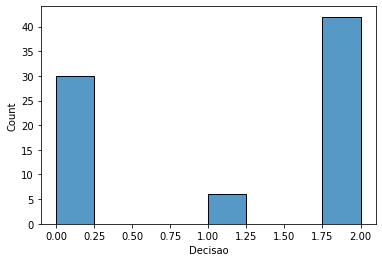

In [83]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
print(base_dados["Decisao"].value_counts(normalize=True).map("{:.1%}".format))
_ = sns.histplot(base_dados['Decisao'])

2    53.8%
0    46.2%
Name: Decisao, dtype: object


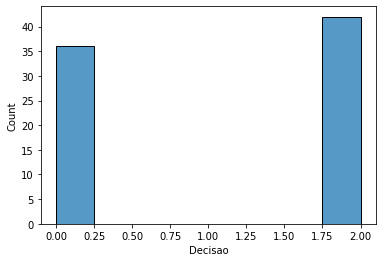

In [84]:
#vou tirar a categoria 1 e transformar tudo em 0
base_dados.loc[base_dados["Decisao"]==1,"Decisao"]=0
print(base_dados["Decisao"].value_counts(normalize=True).map("{:.1%}".format))
fig=sns.histplot(base_dados["Decisao"])

#### 2. Correlação

<function matplotlib.pyplot.show(close=None, block=None)>

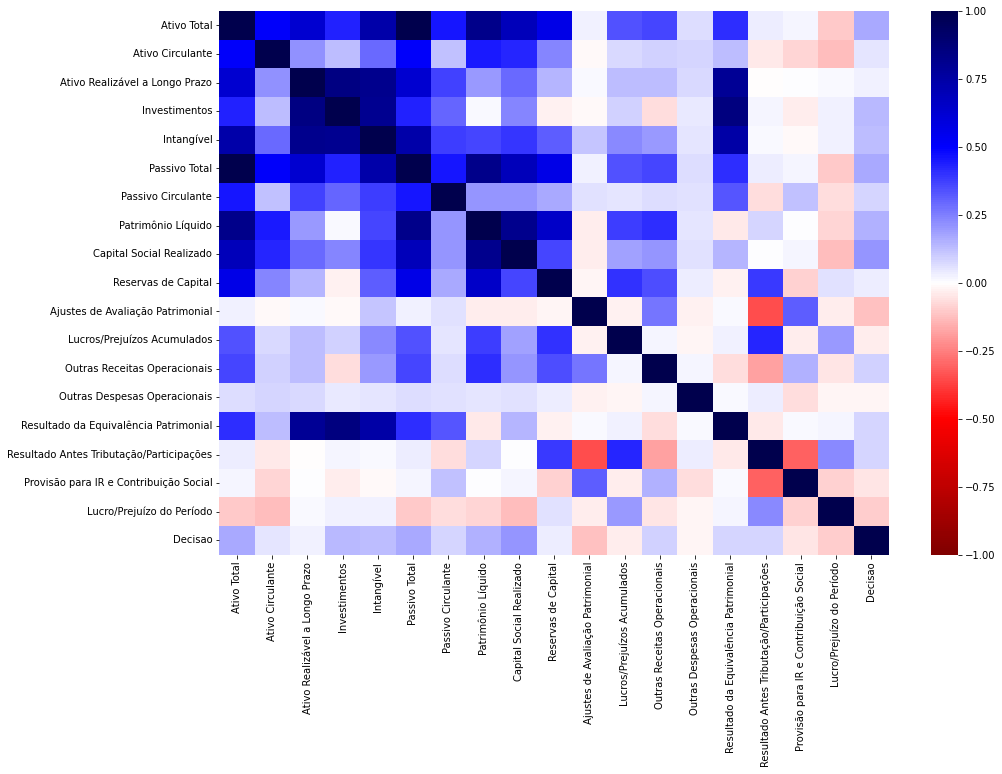

In [85]:
correlacoes=base_dados.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(correlacoes,cmap="seismic_r",ax=ax,vmax=1,vmin=-1)
plt.show
#correlação é um numero entre -1 e 1 e quanto mais proximo de 1, mais diretamente proporcional as colunas sao
#quanto mais proximo de -1 mais inversamente proprocionais as colunas sao

#### Vamos remover Todas as Colunas "já explicadas" pelo Ativo Total

In [86]:
correlacoes_encontradas=[]
for coluna in correlacoes:
    for linha in correlacoes.index:
        if linha != coluna:
            valor=abs(correlacoes.loc[linha,coluna])
            if valor >0.8 and (coluna,linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha, coluna, valor))
                print(f"Correlação encontrada: {linha} e {coluna}, valor:{valor}")


Correlação encontrada: Passivo Total e Ativo Total, valor:1.0
Correlação encontrada: Patrimônio Líquido e Ativo Total, valor:0.8271235981404542
Correlação encontrada: Investimentos e Ativo Realizável a Longo Prazo, valor:0.8462989687957146
Correlação encontrada: Intangível e Ativo Realizável a Longo Prazo, valor:0.8192086505489887
Correlação encontrada: Intangível e Investimentos, valor:0.8051235430966833
Correlação encontrada: Resultado da Equivalência Patrimonial e Investimentos, valor:0.8592271600124313
Correlação encontrada: Patrimônio Líquido e Passivo Total, valor:0.8271235981404542
Correlação encontrada: Capital Social Realizado e Patrimônio Líquido, valor:0.8167713761528204


Agora com base nessa média que nos traz quais variaveis mais impactam na previsão, vamos refazer um modelo de regressão linear utilizando menos variaveis

### Vamos partir para Feature Selection

Será que todas essas features são importantes mesmo para o nosso modelo? Muitas features nem sempre é bom, se pudermos reduzir sem perder eficiência do nosso modelo, melhor

Aqui temos 2 alternativas:

1. Seguir com todas as features e depois tentar melhorar o nosso modelo
2. Usar algum critério para selecionar as melhores features para prever e criar o modelo a partir apenas dessa seleção menor de features

Vou seguir com a opção 2, porque é mais rápida e, caso dê certo, facilita a nossa vida. Se der errado, a gente volta aqui e refaz o processo

In [93]:
#vamos treinar uma arvore de decisao e pegar as caracteristicas mais importantes dela
from  sklearn.ensemble import ExtraTreesClassifier
if 'empresa' in base_dados.columns:
    base_dados.drop('empresa',axis=1,inplace=True)

modelo=ExtraTreesClassifier(random_state=1)
x=base_dados.drop(["Decisao"],axis=1)
y=base_dados["Decisao"]
modelo.fit(x,y)

caracteristicas_importantes=pd.DataFrame(modelo.feature_importances_,x.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10=list(caracteristicas_importantes.index)[:10]
print(top10)


,0
Resultado da Equivalência Patrimonial,0.078348
Ativo Realizável a Longo Prazo,0.076758
Lucro/Prejuízo do Período,0.073960
Passivo Total,0.067587
Ativo Total,0.065239
Passivo Circulante,0.060858
Outras Receitas Operacionais,0.060018
Patrimônio Líquido,0.059051
Investimentos,0.057989
Ativo Circulante,0.057424


['Resultado da Equivalência Patrimonial', 'Ativo Realizável a Longo Prazo', 'Lucro/Prejuízo do Período', 'Passivo Total', 'Ativo Total', 'Passivo Circulante', 'Outras Receitas Operacionais', 'Patrimônio Líquido', 'Investimentos', 'Ativo Circulante']


### Aplicação do StandardScaler para melhorar nossos modelos de MachineLearning

In [94]:
from sklearn.preprocessing import StandardScaler

def ajustar_scaler(tabela_original):
    scaler=StandardScaler()
    tabela_auxiliar=tabela_original.drop("Decisao",axis=1)
    tabela_auxiliar=pd.DataFrame(scaler.fit_transform(tabela_auxiliar),tabela_auxiliar.index,tabela_auxiliar.columns)
    tabela_auxiliar["Decisao"]=tabela_original["Decisao"]
    return tabela_auxiliar

nova_base_dados=ajustar_scaler(base_dados)
top10.append("Decisao")
nova_base_dados=nova_base_dados[top10].reset_index(drop=True)
display(nova_base_dados)

,Resultado da Equivalência Patrimonial,Ativo Realizável a Longo Prazo,Lucro/Prejuízo do Período,Passivo Total,Ativo Total,Passivo Circulante,Outras Receitas Operacionais,Patrimônio Líquido,Investimentos,Ativo Circulante,Decisao
0,-0.246655,-0.224967,0.084880,0.180178,0.148220,-0.053974,0.075540,0.083041,-0.140150,0.339680,2
1,-0.057509,-0.018028,0.078761,-0.095730,-0.172975,-0.158021,-0.312227,-0.320250,-0.136284,-0.333241,2
2,0.029752,-0.250969,0.073800,-0.189804,-0.282490,-0.257525,-0.331813,0.124697,-0.131795,-0.117223,0
3,0.334163,0.134669,0.312235,0.047812,-0.005872,-0.091632,-0.191762,-0.458630,-0.125001,-0.447115,2
4,-0.367045,-0.228076,-0.028618,-0.290875,-0.400149,-0.387575,-0.275887,-0.267918,-0.136610,-0.283025,0
...,...,...,...,...,...,...,...,...,...,...,...
88,-0.179567,0.107299,0.089855,-0.022888,-0.088177,0.465784,0.760928,-0.083873,-0.134475,-0.041493,2
89,-0.179567,0.537276,0.195332,0.147826,0.110557,0.123589,-0.400867,0.604361,3.121785,-0.277396,2
90,-0.179567,0.424781,0.088966,0.290072,0.276151,-0.055867,-0.063116,0.185530,-0.105048,0.075633,2
91,-0.421705,-0.006198,0.114622,-0.106560,-0.185582,-0.484901,-0.382374,-0.040337,-0.135336,-0.191541,2


### Separação dos dados em treino e teste

In [95]:
from sklearn.model_selection import train_test_split

x=nova_base_dados.drop("Decisao",axis=1)
y=nova_base_dados["Decisao"]
x_treino, x_teste,y_treino,y_teste=train_test_split(x,y,random_state=1)


### Criação de um Dummy Classifier (Uma baseline para ver se os nossos modelos são melhores do que puro chute)

In [96]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report,confusion_matrix

dummy=DummyClassifier(strategy="stratified",random_state=2)
dummy.fit(x_treino,y_treino)
previsao_dummy=dummy.predict(x_teste)




### Métricas de Avaliação

- Precisão vai ser nossa métrica principal
- Recall pode ser útil, mas precisão no caso de ações é mt mais importante.

Explicação: Foto dos Gatos e Cachorros na Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

Dummy
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           2       0.62      0.38      0.48        13

    accuracy                           0.54        24
   macro avg       0.56      0.56      0.53        24
weighted avg       0.57      0.54      0.53        24



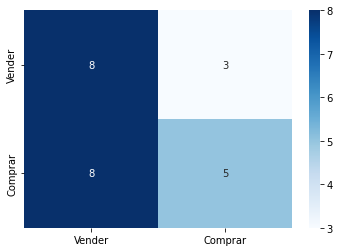

##################################################


In [97]:
def avaliar(y_teste,previsoes,nome_modelo):
    print(nome_modelo)
    report=classification_report(y_teste,previsoes)
    print(report)
    cf_matrix=pd.DataFrame(confusion_matrix(y_teste,previsoes),index=["Vender","Comprar"],columns=["Vender","Comprar"])
    sns.heatmap(cf_matrix,annot=True,cmap="Blues",fmt=",")
    plt.show()
    print("#"*50)



avaliar(y_teste,previsao_dummy,"Dummy")
#precisao é o quanto o modelo esta acertando
#recall é o quanto do percentual de compras/vendas, ele mandou comprar/vender


### Modelos que vamos testar
- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM)
- Rede Neural

In [98]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


modelos={
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DesicionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost":GradientBoostingClassifier(random_state=1),
    "KNN":KNeighborsClassifier(),
    "LogisticRegression":LogisticRegression(random_state=1),
    "NaiveBayes":GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural":MLPClassifier(random_state=1,max_iter=400)
}


AdaBoost
              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           2       0.53      0.69      0.60        13

    accuracy                           0.50        24
   macro avg       0.48      0.48      0.47        24
weighted avg       0.48      0.50      0.48        24



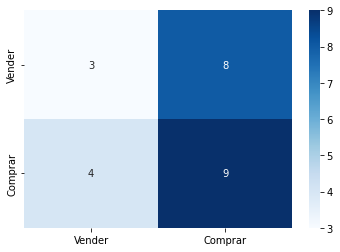

##################################################
DesicionTree
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           2       0.53      0.62      0.57        13

    accuracy                           0.50        24
   macro avg       0.49      0.49      0.49        24
weighted avg       0.49      0.50      0.49        24



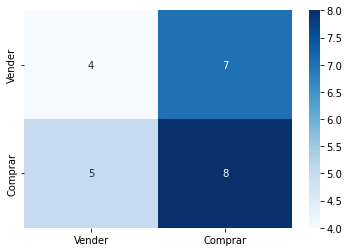

##################################################
RandomForest
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           2       0.67      0.46      0.55        13

    accuracy                           0.58        24
   macro avg       0.60      0.59      0.58        24
weighted avg       0.61      0.58      0.58        24



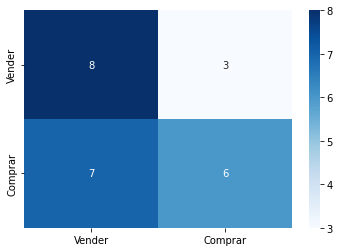

##################################################
ExtraTree
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           2       0.67      0.46      0.55        13

    accuracy                           0.58        24
   macro avg       0.60      0.59      0.58        24
weighted avg       0.61      0.58      0.58        24



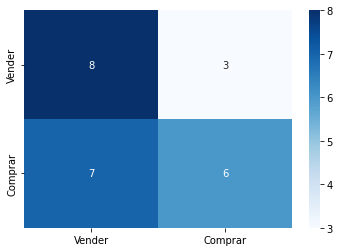

##################################################
GradientBoost
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           2       0.58      0.54      0.56        13

    accuracy                           0.54        24
   macro avg       0.54      0.54      0.54        24
weighted avg       0.55      0.54      0.54        24



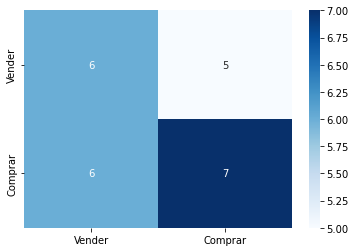

##################################################
KNN
              precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           2       0.56      0.38      0.45        13

    accuracy                           0.50        24
   macro avg       0.51      0.51      0.50        24
weighted avg       0.51      0.50      0.49        24



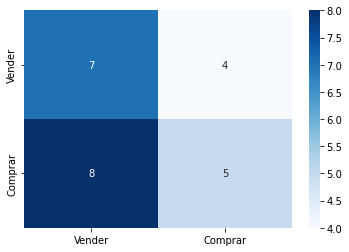

##################################################
LogisticRegression
              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           2       0.57      0.31      0.40        13

    accuracy                           0.50        24
   macro avg       0.52      0.52      0.49        24
weighted avg       0.53      0.50      0.48        24



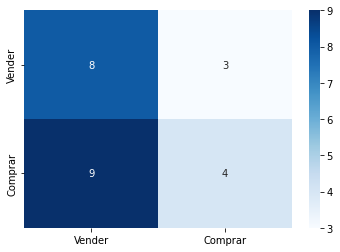

##################################################
NaiveBayes
              precision    recall  f1-score   support

           0       0.50      0.91      0.65        11
           2       0.75      0.23      0.35        13

    accuracy                           0.54        24
   macro avg       0.62      0.57      0.50        24
weighted avg       0.64      0.54      0.49        24



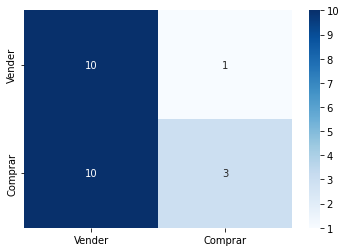

##################################################
SVM
              precision    recall  f1-score   support

           0       0.48      0.91      0.62        11
           2       0.67      0.15      0.25        13

    accuracy                           0.50        24
   macro avg       0.57      0.53      0.44        24
weighted avg       0.58      0.50      0.42        24



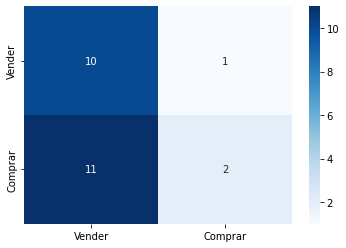

##################################################
RedeNeural
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           2       0.57      0.62      0.59        13

    accuracy                           0.54        24
   macro avg       0.54      0.53      0.53        24
weighted avg       0.54      0.54      0.54        24



C:\Users\diogo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


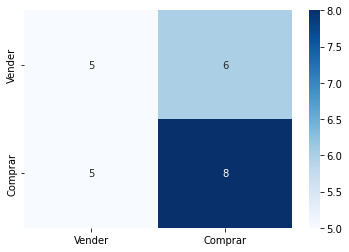

##################################################


In [99]:
for nome_modelo in modelos:
    modelo=modelos[nome_modelo]
    modelo.fit(x_treino,y_treino)
    previsoes=modelo.predict(x_teste)
    avaliar(y_teste,previsoes,nome_modelo)
    modelos[nome_modelo]=modelo
    

### Agora vamos ao tunning do modelo

- é bom sempre incluir no tuning os parâmetros "padrões" do modelo, se não poder ser que vc só encontre resultados piores

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,precision_score
modelo_final=modelos["RandomForest"]
n_estimators=range(10,251,30)
max_features=list(range(2,11,2))
max_features.append("auto")
min_samples_split=range(2,11,2)

precision2_score=make_scorer(precision_score,labels=[2],average="macro")
grid=GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators":n_estimators,
        "max_features":max_features,
        "min_samples_split":min_samples_split,
        "random_state":[1],
    },
    scoring=precision2_score,
)

resultado_grid=grid.fit(x_treino,y_treino)
print("Ajuste feito")

Ajuste feito


RandomForest Tunado
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        11
           2       0.60      0.46      0.52        13

    accuracy                           0.54        24
   macro avg       0.55      0.55      0.54        24
weighted avg       0.55      0.54      0.54        24



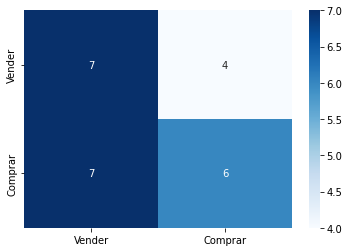

##################################################


In [101]:
modelo_tunado=resultado_grid.best_estimator_
previsoes=modelo_tunado.predict(x_teste)
avaliar(y_teste,previsoes,"RandomForest Tunado")

### Vamos seguir então com o Modelo RandomForest tunado para ser o nosso modelo

- Agora ao que interessa...será que vamos conseguir escolher boas ações e ter uma carteira rentável?
- Para isso, temos que pegar o último Trimestre (que não usamos para treinar o modelo nem testar) e ver como ele teria saído até o momento em que gravo esse vídeo...

### Repetindo os passos com a base fundamentos só que pegando apenas o último tri de cada empresa

In [102]:
# na nossa base de dados, nos excluimos a primeira e a ultima linha, pois elas nao tinham com oq comparar, agora vamos manter as linhas
ult_tri_fundamentos=fundamentos.copy()
ult_tri_base_dados=pd.DataFrame()
lista_empresas=[]
for empresa in ult_tri_fundamentos:
    ult_tri_fundamentos[empresa]=ult_tri_fundamentos[empresa][-1:]
    ult_tri_fundamentos[empresa]=ult_tri_fundamentos[empresa].reset_index(drop=True)
    ult_tri_base_dados=ult_tri_base_dados.append(ult_tri_fundamentos[empresa])
    lista_empresas.append(empresa)
display(ult_tri_base_dados)
print(lista_empresas)

,Ativo Total,Ativo Circulante,Ativo Realizável a Longo Prazo,Investimentos,Intangível,Passivo Total,Passivo Circulante,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Ajustes de Avaliação Patrimonial,Outras Receitas Operacionais,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,Lucro/Prejuízo do Período,Decisao
0,0.028175,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.138290,-1.000000,-1.000000,1.000000,0.001577,-0.750614,0.339305,0.459408,4.612707,0.368637,0
0,-0.016187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049319,0.000000,0.000000,0.000000,0.304136,0.250195,0.704939,0.669372,-0.776848,0.467048,0
0,0.290040,-0.192733,1.474510,1.614235,0.476990,0.290040,0.357762,-0.003635,-0.001491,7.333333,-11.040397,37.780027,0.192032,-1.268741,0.752320,-1.000000,2.202166,0
0,0.044774,-0.201874,0.330366,0.016705,0.607745,0.044774,-0.308280,0.132232,0.000000,0.000000,-0.059083,0.000000,-81.142857,0.705767,0.106081,-0.194379,0.079831,0
0,0.042771,0.725052,-0.110346,0.064440,0.000000,0.042771,0.660122,0.075306,0.000000,0.012525,-1.000000,11.000000,-0.437500,0.336186,0.194122,-0.051020,0.172451,0
0,0.036477,0.018462,0.089042,-0.003008,0.072903,0.036477,0.014258,-0.014358,0.000000,-11.803992,0.000000,3098.977846,0.000000,-0.651624,0.265369,1.000000,0.255796,0
0,0.110890,0.153617,-0.149142,-0.968885,0.045295,0.110890,0.317519,0.076766,0.000000,-0.067878,-0.027383,3.242607,0.045018,-1.000000,0.150493,0.740534,0.186283,0


['BBAS3', 'BBDC3', 'BIDI3', 'EGIE3', 'ITUB3', 'MGLU3', 'WEGE3']


In [78]:
ult_tri_base_dados=ult_tri_base_dados.reset_index(drop=True)
ult_tri_base_dados=ult_tri_base_dados[top10]
ult_tri_base_dados=ajustar_scaler(ult_tri_base_dados)
ult_tri_base_dados=ult_tri_base_dados.drop(columns=["Decisao"])
display(ult_tri_base_dados)

,Resultado da Equivalência Patrimonial,Ativo Realizável a Longo Prazo,Lucro/Prejuízo do Período,Passivo Total,Ativo Total,Passivo Circulante,Outras Receitas Operacionais,Patrimônio Líquido,Investimentos,Ativo Circulante
0,0.594859,-1.596156,-0.237846,-2.384895,-0.517954,-2.006346,-0.416284,1.328611,-1.192924,-1.947764
1,1.069262,-0.132642,-0.095587,0.173632,-0.991413,-0.011791,-0.416004,-0.280884,0.049061,0.149014
2,-1.491552,2.025323,2.412615,0.915707,2.276854,0.701785,-0.381350,-1.238815,2.053916,-0.255105
3,1.070337,0.350852,-0.655329,0.288187,-0.340802,-0.626673,-0.416285,1.219027,0.069808,-0.274270
4,0.590812,-0.294135,-0.521442,0.283064,-0.362172,1.304858,-0.406114,0.189225,0.129094,1.669287
5,-0.690853,-0.002328,-0.400963,0.266960,-0.429347,0.016648,2.449325,-1.432797,0.045325,0.187725
6,-1.142865,-0.350914,-0.501448,0.457346,0.364834,0.621519,-0.413287,0.215633,-1.154280,0.471114


In [111]:
previsoes_ult_tri=modelo_tunado.predict(ult_tri_base_dados)
print(previsoes_ult_tri)
carteira=[]
carteira_inicial=[]
for i,empresa in enumerate(lista_empresas):
    if previsoes_ult_tri[i]==2:
        print(empresa)
        carteira_inicial.append(1000)
        cotacao=cotacoes[empresa]
        cotacao_inicial=cotacao.loc["2020-12-30","Adj Close"]
        cotacao_final=cotacao.loc["2021-03-31","Adj Close"]
        percentual=cotacao_final/cotacao_inicial
        carteira.append(1000*percentual)
saldo_inicial=sum(carteira_inicial)
saldo_final=sum(carteira)
print(saldo_inicial,saldo_final)
print((saldo_final/saldo_inicial)-1)

[0 0 2 2 2 0 2]
BIDI3
EGIE3
ITUB3
WEGE3
4000 4440.309622114789
0.11007740552869727


### Agora fazemos a previsão de decisões

In [103]:
varicao_ibov=(df_ibov.loc["2021-03-31","IBOV"]/df_ibov.loc["2020-12-30","IBOV"])-1
print(varicao_ibov)

-0.02239619130638859


In [104]:
#armazenar a inteligencia artificial

import joblib
joblib.dump(modelo_tunado,"IA_carteiras_ativos.joblib")


#para puxar a ia é preciso fazer isso
modelo_tunado=joblib.load("IA_carteiras_ativos.joblib")

In [1]:
import pandas as pd 
from pandas_datareader import data as web 
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np
from prefect import task
from numpy import divide
import yfinance as yf


def trata_df(df,ticket): #Faz o tratamento dos dados baixados do yahoo finance e deixa somente a data e o valor do ativo
    for i in list(df.columns):
        if i!='Adj Close': #mantém somente a coluna com o valor do fechamento do ativo
            df=df.drop(columns=i)
    df['Data']=df.index #A data deixa de ser index e passa a ser uma coluna
    df=df.reset_index(drop=True)
    df.columns=[ticket,'Data']
    aux=['Data',ticket] #auxiliar para alterar a ordem das colunas
    df=df[aux]
    return df


def df_preços(tickets): #tem como input uma lista de tickets, e retorna um data frame com o histórico de preços de todos eles
    df_vazio=pd.DataFrame(columns=['Data']) #df auxiliar
    hoje=datetime.today().strftime('%Y-%m-%d') #calculando o dia de hoje
    for i in tickets: #para cada ticket, se tem a busca de dados e a filtragem
        df= web.DataReader(i, data_source='yahoo', start='2019-07-19', end=hoje)
        df=trata_df(df,i)
        df_vazio=pd.merge(df_vazio,df,how='outer') #cada ticket é concatenado no df final
    return df_vazio

def df_preços_normalizados(df): #normaliza os preços dos ativos
    for i in list(df.columns):
        if i !='Data':
            df[i]=df[i]/df[i].iloc[0]*100
    return df

def df_retorno(df): #calcula o retorno diario do ativo
    for i in list(df.columns):
        if i!='Data':
            df[i]= np.log(df[i]) - np.log(df[i].shift(1))
    return df


def df_retorno_anual(df): #em posse do retorno diario do ativo, calcula o retorno anual
    lista=[]
    for i in list(df.columns):
        if i!= 'Data':
            lista.append([i, df[i].mean()*252])
    df_aux=pd.DataFrame(lista,columns=['Ticket','Retorno Anual'])
    return df_aux

def calcula_pesos(n): #gera uma distribuição de pesos em que a soma é igual a 1, dividido em n ativos
    pesos=np.random.rand(n)
    return pesos/sum(pesos)

def calcula_portifolio_maximo(n,df_ra,port,tickets):
    #n= quantidade de pesos gerados 
    #df_ra=df que contenha os tickets e seus retornos anuais
    #port=df que contenha os tickets e seus preços normalizados
    #tickets= lista com os ativos
    lista=[] #lista auxiliar
    qtd_tickets=df_ra.shape[0]
    port=port.drop(columns=['Data'])
    for i in range(n): #para cada geração de uma combinação de pesos 
        pesos=calcula_pesos(qtd_tickets) #calcula os pesos dada a quantidade de ativos
        df_ra['Pesos']=pd.DataFrame(pesos)
        retorno_esperado=sum(df_ra['Retorno Anual']*df_ra['Pesos']) #calcula o retorno esperado anual
        log_ret = np.log(port/port.shift(1)) 
        vol = np.sqrt(np.dot(pesos.T, np.dot(log_ret.cov()*252, pesos))) #calcula a volatividade
        lista.append([list(pesos),retorno_esperado,vol])

    resultado=pd.DataFrame(lista,columns=['Pesos','Retorno Esperado','Volatividade']) #transforma os resultados de cada ativo em um df
    resultado['Indice']=resultado['Retorno Esperado']/resultado['Volatividade'] #gera o indice retorno/risco
    info_indice_maximo=resultado.loc[resultado['Indice'].idxmax()] #calcula qual o maior indice
    return pd.DataFrame(info_indice_maximo['Pesos'],index=tickets,columns=['Pesos']) #retorna a distribuição de pesos com o melhor inidice retorno/risco

@task
def ultimo_preco(tickets): #filtra o último preço coletado dos tickets
    lista=[]
    historico_preços=df_preços(tickets) #pega o histórico de preços
    for i in tickets:
        ultimo_preço=float(historico_preços[i].iloc[-1]) #seleciona o ultimo
        lista.append([i,ultimo_preço]) #faz o append pra cada tipo de ativo
    df=pd.DataFrame(lista,columns=['Tickets','Preço atual'])
    return df

def trata_df_dividendos(df):#trata os dados do data frame da forma como queremos e preferimos trabalhar
    df['Data']=df.index
    df=df.reset_index(drop=True)
    df.columns=['Dividends','Data']
    aux=['Data','Dividends']
    df=df[aux]
    return df

@task
def acrescenta_dividendos(tickets,carteira,valor_investido): #acrescenta, caso haja, o dividendo ao valor investido
    numero_acoes=list(carteira['Quantidade']) #quantidade de todos os ativos
    for i in range(len(tickets)): #pra cada ativo
       ticker_selecionado=yf.Ticker(tickets[i])
       dividendo=[ticker_selecionado.dividends] #coleta os dividendos
       dividendo=(pd.DataFrame(dividendo)).T 
       dividendo=trata_df_dividendos(dividendo) #trata os dados dos dividendos
       if dividendo.shape[0]!=0: #se o ativo pagar dividendos
           data_ultimo_dividendo=str(dividendo['Data'].iloc[-1]) #seleciona a ultima data
           hoje_str=datetime.today().strftime('%Y-%m-%d') 
           if data_ultimo_dividendo==hoje_str: #caso tenha sido hoje
               valor_dividendo=float(dividendo['Dividends'].iloc[-1])
               quantidade_acoes=numero_acoes[i]
               valor_recebido=valor_dividendo*quantidade_acoes #o valor recebido de dividendo é calculado
               valor_investido=valor_investido+valor_recebido # e somado ao valor investido 
    return (valor_investido)

@task
def funcao_define_pesos_otimos(tickets,n): #faz o processo do calculo dos pesos ideias
    tickets_precos=df_preços(tickets)
    tickets_precos_normalizados=df_preços_normalizados(tickets_precos)
    tickets_precos_normalizados_copy=tickets_precos_normalizados.copy()
    tickets_retorno=df_retorno(tickets_precos)
    tickets_retorno_anual=df_retorno_anual(tickets_retorno)
    return (calcula_portifolio_maximo(n,tickets_retorno_anual,tickets_precos_normalizados_copy,tickets))

@task
def ler_excel(filepath): #le o arquivo excel no caminho especificado
    df=pd.read_excel(filepath,sheet_name='Sheet1')
    return df

@task
def define_acoes(carteira): #seleciona as ações que vem da planilha
    acoes=list(carteira['Tickets'])
    return acoes

@task
def quantidade_acoes(carteira): #seleciona a quantidade das ações que vem da planilha
    qtd_acoes=list(carteira['Quantidade'])
    return qtd_acoes

@task
def define_valor_investido(carteira): #seleciona o valor investido que vem da planilha
    return carteira['Valor Investido'][0]

@task
def salvar_excel(carteira_inicial,carteira_otima,valor_investido,preços,filepath): #salva o arquivo excel atualizado
    carteira_otima=carteira_otima.reset_index(drop=True) #todos os novos valores são atribuidos ao df que vai ser salvo
    carteira_inicial['Pesos']=carteira_otima['Pesos']   
    carteira_inicial['Valor Investido'][0]=valor_investido
    carteira_inicial['Quantidade']=(carteira_inicial['Pesos']*valor_investido)/preços['Preço atual']
    carteira_inicial['Último preço']=preços['Preço atual']
    carteira_inicial.to_excel(filepath,sheet_name='Sheet1',index=False)
    

ModuleNotFoundError: No module named 'prefect'

In [ ]:
"""Inicialmente fazemos os imports necessários, e entre eles temos as funções e tasks de outros códigos criados por nós
A ideia do trabalho é o calculo da distribuição ideal de uma carteira que visa o maior retorno possível. 
 Esse calculo ocorre diariamente com a intenção de um "day trade".
De forma operacional: existe um arquivo excel que podem conter uma quantidade indefinida de ativos. Esse arquivo é lido,
os dados de cada ativo é coletado no yahoo finance, e baseado na Teoria de Markowitz a distribuição de pesos ideal é calculada.
A planilha também contém uma célula para valor investido, que pode ser alterado a qualquer momento, caso o investidor decida.
Em seguida o arquivo excel é atualizado com os novos dados.
O código é programado pra rodar uma vez ao dia.
Referências: https://medium.com/@cesar.vieira/o-modelo-de-markowitz-como-diversificar-a-sua-carteira-de-investimentos-ec860bd0d637"""

from prefect import task, Flow
import pandas as pd
from prefect.schedules.schedules import Schedule
from datetime import timedelta
from prefect.schedules import clocks, Schedule,filters,schedules


#O Schedule é o  agendamento do fluxo, neste caso, ele ocorre uma vez ao dia durante os dias de semana
meu_schedule=schedules.Schedule(clocks=[clocks.IntervalClock(timedelta(days=1))],filters=[filters.is_weekday])
print(meu_schedule.next(5)) #Printa os próximos 5 horários que que o código vai rodar, ideal para verificaçãos
with Flow("Carteira ativos",meu_schedule) as flow:
    #Lendo os dados
    carteira=ler_excel(r'C:\Users\User\Desktop\trabalho carteira\carteira_ações.xlsx') 

    #Definindo os que é necessário
    acoes=define_acoes(carteira)
    quantidades=quantidade_acoes(carteira)
    preços_atuais=ultimo_preco(acoes)
    valor_investido=define_valor_investido(carteira)

    #Calculando os pesos ótimos
    carteira_otima=funcao_define_pesos_otimos(acoes,1000)
    
    #Acrescentando os dividendos
    valor_investido_atual=acrescenta_dividendos(acoes,carteira,valor_investido)

    #Salvando a nova carteira 
    salvar_excel(carteira,carteira_otima,valor_investido_atual,preços_atuais,r'C:\Users\User\Desktop\trabalho carteira\carteira_ações.xlsx')

if __name__=="__main__":
    flow.run()

